In [33]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv(r'C:\Users\ASUS\data_analyst\video_id_info.csv',on_bad_lines='skip')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6072\3842046896.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ASUS\data_analyst\video_id_info.csv',on_bad_lines='skip')


In [35]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [36]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# sentiment analysis

In [39]:
# !pip install textblob

In [40]:
import sys   #it's called 'sys' because it provides access to system specifics parameters and functions
from textblob import TextBlob

In [41]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [42]:
df.shape

(691375, 4)

In [43]:
sample_df = df[0:1000]

In [44]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️")  #normal text box

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [45]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment 

Sentiment(polarity=0.0, subjectivity=0.1)

In [46]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity 

0.0

In [47]:
polarity = []

for comment in df['comment_text']:
    try:   #if there is an blank text then will get the exception error
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [48]:
len(polarity)

691375

In [49]:
df['polarity'] = polarity

In [50]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# wordcloud analysis of your data

In [51]:
filter1 = df['polarity'] == 1
comments_positive = df[filter1]

In [52]:
filter2 = df['polarity'] == -1
comments_negative = df[filter2]

In [53]:
# !pip install wordcloud

In [54]:
import sys 
from wordcloud import WordCloud, STOPWORDS

In [55]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [56]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [57]:
type(df['comment_text'])

pandas.core.series.Series

In [58]:
total_pos_comment = ' '.join(comments_positive['comment_text'])

In [60]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_pos_comment)

(-0.5, 399.5, 199.5, -0.5)

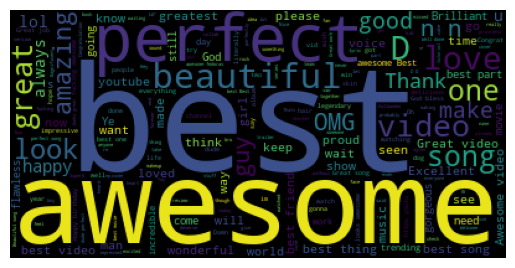

In [61]:
plt.imshow(wordcloud)
plt.axis('off')

In [62]:
total_neg_comment = " ".join(comments_negative['comment_text'])

In [63]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_neg_comment)

(-0.5, 399.5, 199.5, -0.5)

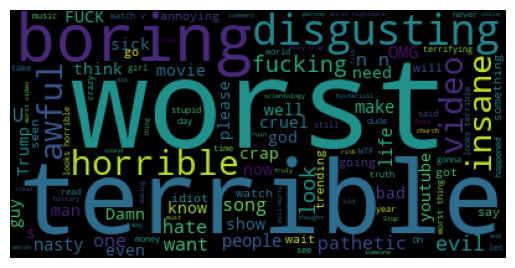

In [65]:
plt.imshow(wordcloud)
plt.axis('off')

In [66]:
!pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/e6/90/20ad30babfa8f2b5ab46281d8e17bdfdbb3ac294cda14d525b9c2d958846/emoji-2.12.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   --- ----------------------------------- 41.0/431.4 kB 960.0 kB/s eta 0:00:01
   ------- ------------------------------- 81.9/431.4 kB 919.0 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/431.4 kB 819.2 kB/s eta 0:00:01
   -------------- ----------------------- 163.8/431.4 kB 978.3 kB/s eta 0:00:01
   -------------------- ------------------- 225.3/431.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 307.2/431.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 368.6/431.4 kB 1.1 MB/s eta 0:00:01
   ----------------------------

In [67]:
import emoji

In [69]:
df['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

In [70]:
comment = 'trending 😉'